In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Experiment 1: Compare strategies

In [ ]:
RESULT_PATH = "../result/result.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

df_loss = pd.DataFrame(index=sorted(df_result['round'].unique()))
df_accuracy = pd.DataFrame(index=sorted(df_result['round'].unique()))


for strategy in df_result['strategy'].unique():
    df = df_result[df_result['strategy'] == strategy].sort_values(by=['round'])
    df_loss[strategy] = df['c_loss'].values
    df_accuracy[strategy] = df['c_accuracy'].values


df_loss = df_loss.drop(['FedAdagrad', 'FedAdam'], axis=1)
df_accuracy = df_accuracy.drop(['FedAdagrad', 'FedAdam'], axis=1)

In [ ]:
line_loss = df_loss.plot.line()

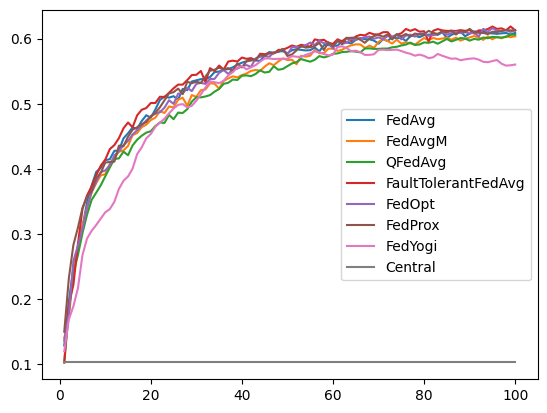

In [36]:
line_accuracy = df_accuracy.plot.line()

# Experiment 2: Change FL scale

* Use pretrained model to initialize the global model in FL system
* The number of data for pre-train : 10,000
* Define `fl_scale` as ratio of (The number of data for FL clients) / (The number of data for pre-train)
    * Compare with cases in which the fl_scale is 0.25, 0.5, 1, 2, or 4.
    * \[Example\] if fl_scale is 0.25,  The number of data used in FL clients is 2,500

In [3]:
RESULT_PATH = "../result/result_exp_fl_scale.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

rounds = sorted(df_result['round'].unique())

df_loss = pd.DataFrame(index=rounds)
df_accuracy = pd.DataFrame(index=rounds)
df_recall = pd.DataFrame(index=rounds)
df_precision = pd.DataFrame(index=rounds)
df_f1 = pd.DataFrame(index=rounds)

df_fedavg = df_result[df_result['strategy'] == 'FedAvg']

for scale in df_fedavg['fl_scale'].unique():
    ratio = f"{max(int(1 / scale), 1)} : {max(1, int(scale))}"

    df = df_fedavg[df_fedavg['fl_scale'] == scale].sort_values(by=['round'])
    df_loss[ratio] = df['c_loss'].values
    df_accuracy[ratio] = df['c_accuracy'].values
    df_recall[ratio] = df['c_recall'].values
    df_precision[ratio] = df['c_precision'].values
    df_f1[ratio] = df['c_f1_score'].values


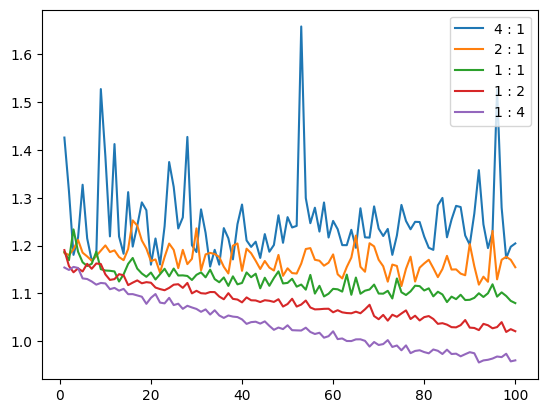

In [4]:
line_loss = df_loss.plot.line()

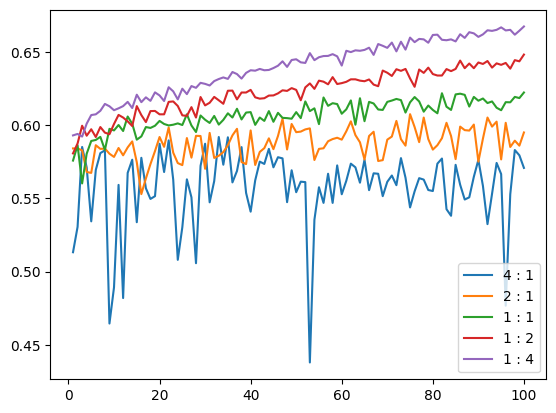

In [5]:
line_accuracy = df_accuracy.plot.line()

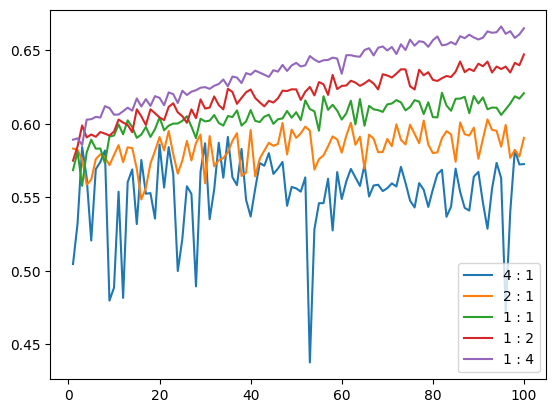

In [6]:
line_f1 = df_f1.plot.line()

# Experiment 3: Compare models

In [3]:
RESULT_PATH = "../result/result_total.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

df_result["name"] = df_result["model"] + "_" + df_result["Centralized"]
df_result.drop(columns=['model', 'Centralized'], inplace=True)

rounds = sorted(df_result['round'].unique())

df_loss = pd.DataFrame(index=rounds)
df_accuracy = pd.DataFrame(index=rounds)
df_recall = pd.DataFrame(index=rounds)
df_precision = pd.DataFrame(index=rounds)
df_f1 = pd.DataFrame(index=rounds)


for name in df_result['name'].unique():

    df = df_result[df_result['name'] == name].sort_values(by=['round'])
    df_loss[name] = df['c_loss'].values
    df_accuracy[name] = df['c_accuracy'].values
    df_recall[name] = df['c_recall'].values
    df_precision[name] = df['c_precision'].values
    df_f1[name] = df['c_f1_score'].values


Text(0, 0.5, 'F1-score')

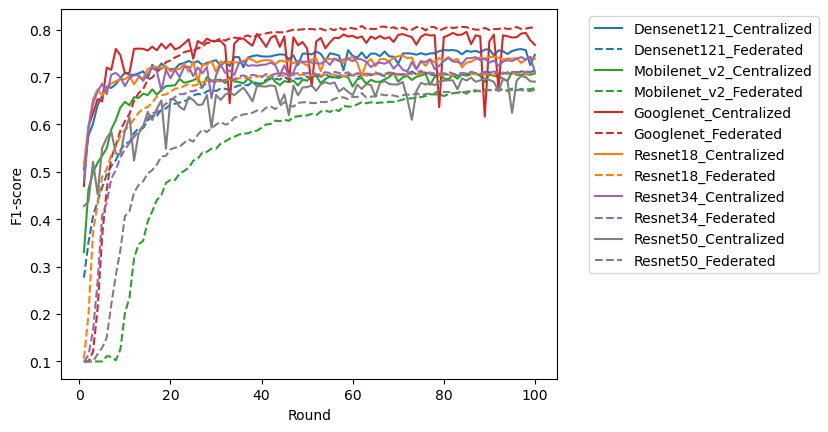

In [7]:
colors = {
    'Densenet121_Centralized': 'tab:blue',
    'Densenet121_Federated': 'tab:blue',
    'Mobilenet_v2_Centralized': 'tab:green',
    'Mobilenet_v2_Federated': 'tab:green',
    'Resnet18_Centralized': 'tab:orange',
    'Resnet18_Federated': 'tab:orange',
    'Resnet34_Centralized': 'tab:purple',
    'Resnet34_Federated': 'tab:purple',
    'Resnet50_Centralized': 'tab:grey',
    'Resnet50_Federated': 'tab:grey',
    'Googlenet_Centralized' : 'tab:red',
    'Googlenet_Federated' : 'tab:red'
}


fig, ax = plt.subplots()
for name in df_accuracy.columns:
    ax.plot(
        rounds, 
        df_accuracy[name].values,
        color=colors[name],
        linestyle='dashed' if 'Federated' in name else 'solid',
        # marker='D' if 'Federated' in name else 'o',
        label=name,
    )

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel("Round")
ax.set_ylabel("F1-score")